<a href="https://colab.research.google.com/github/Bergenstein/projects/blob/main/Stocks_PwD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming with Data Project:

I have decided to analyze 4 top websites among the fortune500 companies. 

This project is in three parts. In the first part, I analyze the stock profile  of FB, Google, MSFT and Amazon within the past 12 years with a particular focus on the 2009 economic crisis and its effect on the stocks of these companies.

For this part, I make heavy use of Pandas, Seasborn, and Plotly libraries for data analytics and visualizations. 

I, then, go on and focus on Hackernews, a YCombinator project, that deals with constant updates from the hacker and tech community. The second part of the project utilizes webscrapping techniques taught by professor Sean McGrath. 

The third and the final part of this project focuses on Amazon jobs. Amazon has grown rapidly in the past year and as someone who works for AWS as a solutions architect, I thought that would be interesting to find remote roles currently advertised at Amazon Jobs. Amazon, just as other companies, has moved many of its operations virtual in response to the pandemic. 





In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [ ]:
#starting, ending dates 
start = datetime.datetime(2007,1,1)
end = datetime.datetime(2020,12,1)
# 4 tech giants used here. I return their stock tickers 
facebook = data.DataReader("FB", 'yahoo', start, end)
google = data.DataReader("GOOG", 'yahoo', start, end)
amazon = data.DataReader("AMZN", 'yahoo', start, end)
microsoft = data.DataReader("MSFT", 'yahoo', start, end)
stock_tickers = ['FB', 'GOOG', 'AMZN', 'MSFT']
tech_stocks = pd.concat([facebook, google, amazon, microsoft], axis=1, keys=stock_tickers)
for t in stock_tickers:
    print(t, int(tech_stocks[t]["Close"].max()))


FB 303
GOOG 1798
AMZN 3531
MSFT 231


In [ ]:
#utilizing pandas library. 
returns = pd.DataFrame()
for t in stock_tickers:
    returns[t+' Return'] = tech_stocks[t]['Close'].pct_change()

In [ ]:
returns

,FB Return,GOOG Return,AMZN Return,MSFT Return
Date,,,,
2007-01-03,NaN,NaN,NaN,NaN
2007-01-04,NaN,0.033512,0.005168,-0.001675
2007-01-05,NaN,0.008132,-0.013625,-0.005703
2007-01-08,NaN,-0.007410,-0.022674,0.009784
2007-01-09,NaN,0.003970,0.007467,0.001002
...,...,...,...,...
2020-11-24,0.031628,0.019610,0.006349,0.017848
2020-11-25,-0.004803,0.001442,0.021491,0.000047
2020-11-27,0.008055,0.012284,0.003224,0.006359


Now I will shift gears and have a bit more focus on visualization and analysis of some statistical features. For visualizations, I utilize seaborn as it offers fairly decent visualization tools. Later, I will utilize plotly and cufflinks, both of which have interactive visualizations.

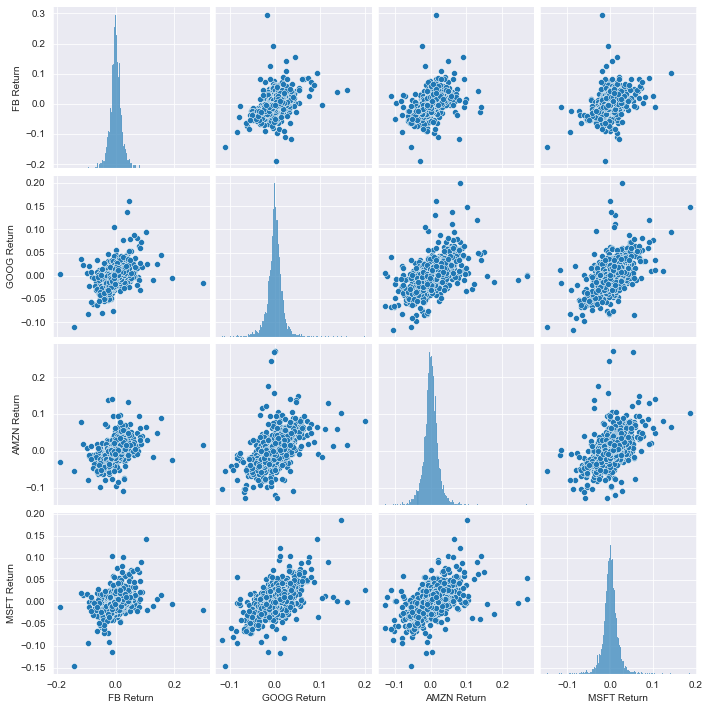

In [ ]:
#using seaborns pairplot to compare these top 4 tech giants
sns.pairplot(returns)

I have decided to return the NA values using the following function and then, subsequently, drop them to have a look at the dataset without NA values. However, I left the dataset intact. I didn't replace the dataset.  

In [ ]:
#getting NA on the items first
def returning_na():
    na_list = []
    
    fb_na = returns.sort_values(by='FB Return', ascending = True, na_position = 'first')
    google_na = returns.sort_values(by='GOOG Return', ascending = True, na_position = 'first')
    amz_na = returns.sort_values(by='AMZN Return', ascending = True, na_position = 'first')
    msft_na = returns.sort_values(by='MSFT Return', ascending = True, na_position = 'first')
    
    na_list.append({"fb": fb_na, "google": google_na, "amazon": amz_na, 'msf': msft_na})
    return(na_list)
returning_na()

[{'fb':             FB Return  GOOG Return  AMZN Return  MSFT Return
  Date                                                        
  2007-01-03        NaN          NaN          NaN          NaN
  2007-01-04        NaN     0.033512     0.005168    -0.001675
  2007-01-05        NaN     0.008132    -0.013625    -0.005703
  2007-01-08        NaN    -0.007410    -0.022674     0.009784
  2007-01-09        NaN     0.003970     0.007467     0.001002
  ...               ...          ...          ...          ...
  2012-11-14   0.125881    -0.009863    -0.016108    -0.009228
  2014-01-30   0.141042     0.025720     0.048959     0.005456
  2016-01-28   0.155214     0.044244     0.089140     0.016400
  2012-10-24   0.191282    -0.004483    -0.024839    -0.005348
  2013-07-25   0.296115    -0.016835     0.014919    -0.017835
  
  [3504 rows x 4 columns],
  'google':             FB Return  GOOG Return  AMZN Return  MSFT Return
  Date                                                        
  2007-01

In [ ]:
#dropping NA values 
returns.dropna()


,FB Return,GOOG Return,AMZN Return,MSFT Return
Date,,,,
2012-05-21,-0.109861,0.022835,0.019920,0.016399
2012-05-22,-0.089039,-0.021674,-0.012746,0.000336
2012-05-23,0.032258,0.014414,0.009056,-0.021841
2012-05-24,0.032187,-0.009517,-0.009389,-0.001374
2012-05-25,-0.033909,-0.020094,-0.010918,-0.000344
...,...,...,...,...
2020-11-24,0.031628,0.019610,0.006349,0.017848
2020-11-25,-0.004803,0.001442,0.021491,0.000047
2020-11-27,0.008055,0.012284,0.003224,0.006359


In the cells below, I do some statistical analysis to find the maximum and the minimum values for these 4 tech giants over the course of the studied period. 

In [ ]:
#getting the minimum stock value for these 4 companies 
returns.idxmin()

FB Return     2018-07-26
GOOG Return   2008-09-29
AMZN Return   2008-10-15
MSFT Return   2020-03-16
dtype: datetime64[ns]

In [ ]:
#getting the maximum stock value for these 4 companies 
returns.idxmax()

FB Return     2013-07-25
GOOG Return   2008-04-18
AMZN Return   2007-04-25
MSFT Return   2008-10-13
dtype: datetime64[ns]

It would be interesting to learn how the companies fared during the subprime mortgage crisis and subsequent stock market crash of 2009 that led to a large-scale crisis, the likes of which had not been seen in modern history. 

In [ ]:
#lets filter the stock returns at the time of the financial crash:
returns.filter(like='2009', axis=0)

,FB Return,GOOG Return,AMZN Return,MSFT Return
Date,,,,
2009-01-02,NaN,0.044434,0.060062,0.045782
2009-01-05,NaN,0.020945,-0.005519,0.009346
2009-01-06,NaN,0.018320,0.061043,0.011696
2009-01-07,NaN,-0.036071,-0.020223,-0.060212
2009-01-08,NaN,0.009875,0.017082,0.031266
...,...,...,...,...
2009-12-24,NaN,0.011117,-0.003383,0.002587
2009-12-28,NaN,0.007098,0.006066,0.005484
2009-12-29,NaN,-0.005571,0.000718,0.007058


As we can see based on the analysis below that the riskies stock for the financial year crash seems to have been that of Amazon. It is quite interesting given that Amazon has the leading position in the year 2020, as will be shown shortly.

In [ ]:
returns.loc['2009-01-01': '2009-12-31'].std() #the riskies stock for the financial year crash seems to have been AMZN

FB Return           NaN
GOOG Return    0.019033
AMZN Return    0.033053
MSFT Return    0.023464
dtype: float64

Now, I will turn to a lot of data visualization and use a variety of techniques to visualize the returns dataset. This will be helpful to see more features. Lets start with Amazon's stock values during the market crash. Then, I look at another histplot to see Amazon's stock values in the year 2020. 

<AxesSubplot:xlabel='AMZN Return', ylabel='Count'>

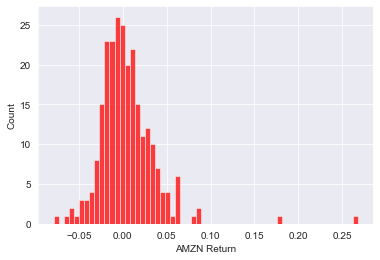

In [ ]:
#Amazon's stock values during the market crash of 2009
sns.histplot(returns.loc['2009-01-01': '2009-12-31']['AMZN Return'], color='red', bins=60)

<AxesSubplot:xlabel='AMZN Return', ylabel='Count'>

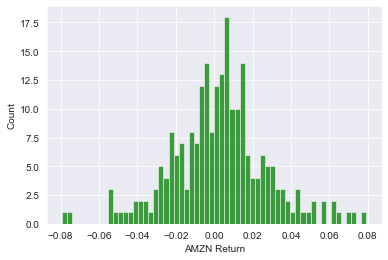

In [ ]:
#amazon's stock values in the year 2020, yet another economic crisis as a result of the global COVID pandemic. 
sns.histplot(returns.loc['2020-01-01': '2020-12-01']['AMZN Return'], color='green', bins=60)

The following cells show the stock values for the aforementioned four tech companies over the course of 12 years, ending December 2020. The second graph is a more interactive form of the first one. It uses Cufflinks library.

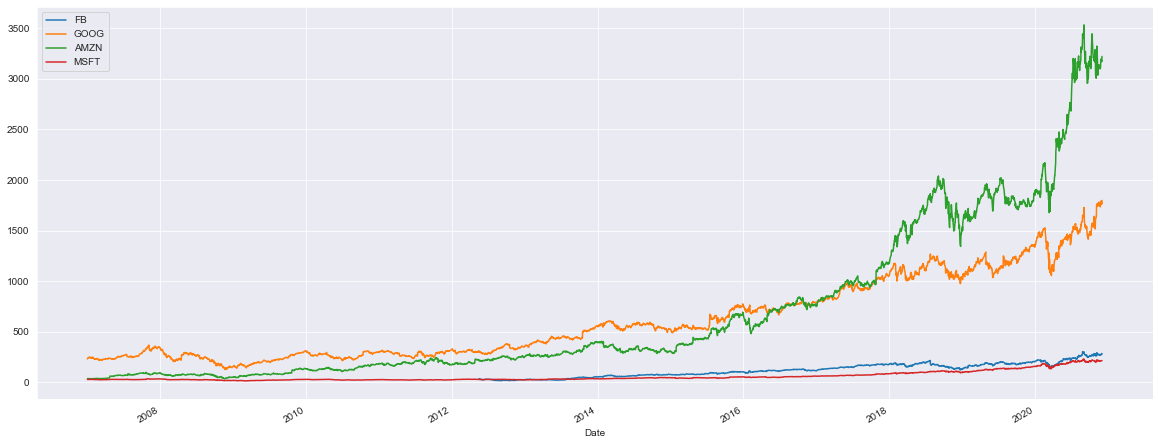

In [ ]:
#compating stocks of all these 4 tech companies over the studied period. 
for t in stock_tickers:
    tech_stocks[t]['Close'].plot(label=t, figsize=(20,8))
plt.legend()

In [ ]:
#the same graph but with more interactions using cufflings
tech_stocks.xs(key='Close', axis=1, level= 1).iplot()

In [ ]:
tech_stocks.describe()

FB                                                       \
              High          Low         Open        Close        Volume   
count  2149.000000  2149.000000  2149.000000  2149.000000  2.149000e+03   
mean    124.059000   121.167785   122.634118   122.672987  3.228568e+07   
std      67.499825    65.939799    66.712019    66.770370  2.868146e+07   
min      18.270000    17.549999    18.080000    17.730000  5.913100e+06   
25%      71.180000    68.849998    69.739998    69.629997  1.625700e+07   
50%     121.080002   118.900002   119.900002   120.279999  2.336330e+07   
75%     178.210007   174.410004   176.300003   176.259995  3.814100e+07   
max     304.670013   293.049988   300.160004   303.910004  5.735764e+08   

                           GOOG                                         ...  \
         Adj Close         High          Low         Open        Close  ...   
count  2149.000000  3504.000000  3504.000000  3504.000000  3504.000000  ...   
mean    122.672987   616.095040   604.379031   610.265996   610.401829  ...   
std      66.770370   398.826883   391.041516   394.646837   395.117940  ...   
min      17.730000   134.182053   123.188263   130.764862   128.239334  ...   
25%      69.629997   282.770103   275.931976   279.564629   279.240837  ...   
50%     120.279999   517.895935   510.279846   514.412659   513.933624  ...   
75%     176.259995   930.825012   918.330002   925.352509   925.457489  ...   
max     303.910004  1824.829956  1772.439941  1790.900024  1798.099976  ...   

              AMZN                                                 MSFT  \
              Open        Close        Volume    Adj Close         High   
count  3504.000000  3504.000000  3.504000e+03  3504.000000  3504.000000   
mean    676.181955   676.087957  5.617143e+06   676.087957    59.391147   
std     770.964459   770.459613  4.569628e+06   770.459613    47.863256   
min      35.290001    35.029999  8.813000e+05    35.029999    15.620000   
25%     132.792503   132.992500  3.102200e+06   132.992500    28.340000   
50%     307.284988   307.339996  4.506400e+06   307.339996    37.225000   
75%     960.027496   960.022522  6.755125e+06   960.022522    70.187500   
max    3547.000000  3531.449951  1.043292e+08  3531.449951   232.860001   

                                                                         
               Low         Open        Close        Volume    Adj Close  
count  3504.000000  3504.000000  3504.000000  3.504000e+03  3504.000000  
mean     58.213253    58.813767    58.829132  4.626429e+07    54.195258  
std      46.779289    47.343132    47.351510  2.783343e+07    48.776898  
min      14.870000    15.200000    15.150000  7.425600e+06    11.608222  
25%      27.847500    28.070000    28.100000  2.696075e+07    21.887842  
50%      36.545000    36.900000    36.875000  3.951800e+07    31.824213  
75%      69.142498    69.715000    69.854998  5.756325e+07    66.268820  
max     227.350006   229.270004   231.649994  3.193179e+08   231.045105  

[8 rows x 24 columns]

As Amazon seems to have performed very well overall, I, once again, have a special focus on Amazon. Lets now compare Amazon's closing yearly stock values and its quarterly average.

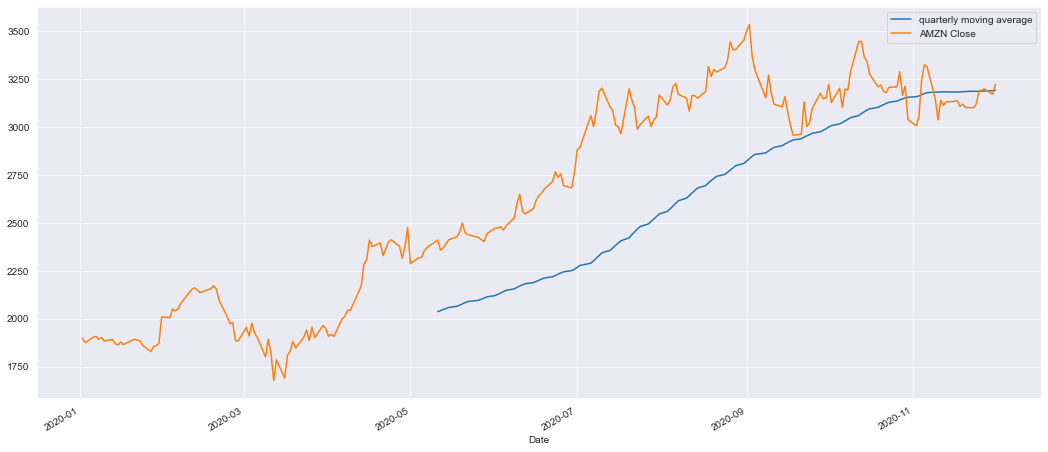

In [ ]:
#comparing Amazon's closing yearly stock values and its quarterly average
plt.figure(figsize=(18,8))
amazon['Close'].loc['2020-01-01':'2020-12-01'].rolling(window=90).mean().plot(label='quarterly moving average')
amazon['Close'].loc['2020-01-01':'2020-12-01'].plot(label="AMZN Close")
plt.legend()

The following  visualizations utilize seaborn and cufflinks to show a nicer looking visualization for the opening and closing prices of the four companies using a corrolation fashion. 

<AxesSubplot:>

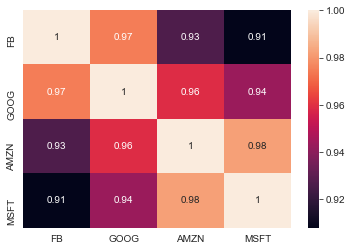

In [ ]:
#correlations between opening prices using heatmap
sns.heatmap(tech_stocks.xs(key='Open', axis=1, level=1).corr(), annot=True)


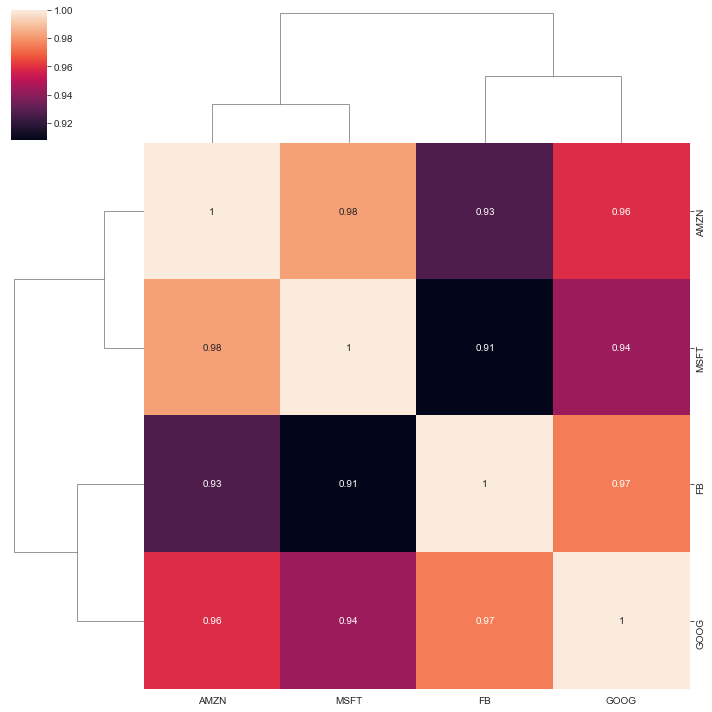

In [ ]:
#now using clustermap for the closing prices:
sns.clustermap(tech_stocks.xs(key='Close', axis=1, level=1).corr(), annot=True)

In [ ]:
#now we use more advanced cufflink and plotly features 
opening_stocks = tech_stocks.xs(key='Open', axis=1, level= 1).corr()

In [ ]:
opening_stocks.iplot(kind="heatmap")

End of Part 1

Part 2: 

The following block of code is utilizing beautiful soup to crawl one of the most famous technology news websites called hacker news. I would like to get the news articles from the top 3 pages of hacker news that have the highest ratings. 

In [ ]:
import requests
from bs4 import BeautifulSoup
import pprint

my_response = requests.get('https://news.ycombinator.com/news')
my_response2 = requests.get('https://news.ycombinator.com/news?p=2')
my_response3 = requests.get('https://news.ycombinator.com/news?p=3')
my_soup = BeautifulSoup(my_response.text, 'html.parser')
my_soup2 = BeautifulSoup(my_response2.text, 'html.parser')
my_soup3 = BeautifulSoup(my_response3.text, 'html.parser')

story_links = my_soup.select('.storylink')
story_text = my_soup.select('.subtext')
story_links2 = my_soup2.select('.storylink')
story_text2 = my_soup2.select('.subtext')
story_links3 = my_soup3.select('.storylink')
story_text3 = my_soup3.select('.subtext')

more_page_story_links = story_links + story_links2 + story_links3
more_page_story_text = story_text + story_text2 + story_text3

def sorted_by_votes(x):
  return sorted(x, key= lambda k:k['votes'], reverse=True) #using Lambda to sort by votes

#the following function takes links and underlines and returns the stories with more than 50 votes
def my_web_crawler(links, underlines):
  my_arr = []
  for i, item in enumerate(links):
    story_title = item.getText()
    href = item.get('href', None)
    story_vote = underlines[i].select('.score')
    if len(story_vote) != 0:
      story_points = int(story_vote[0].getText().replace(' points', ''))
      if story_points > 50:
        my_arr.append({'story_title': story_title, 'link': href, 'votes': story_points})
  return sorted_by_votes(my_arr)
 
pprint.pprint(my_web_crawler(more_page_story_links, more_page_story_text))

[{'link': 'https://www.npr.org/sections/congress-electoral-college-tally-live-updates/2021/01/06/954028436/u-s-capitol-locked-down-amid-escalating-far-right-protests',
  'story_title': 'U.S. Capitol Locked Down Amid Escalating Protests',
  'votes': 1906},
 {'link': 'https://github.blog/2021-01-05-advancing-developer-freedom-github-is-fully-available-in-iran/',
  'story_title': 'GitHub is fully available in Iran',
  'votes': 1656},
 {'link': 'https://arstechnica.com/tech-policy/2021/01/whatsapp-users-must-share-their-data-with-facebook-or-stop-using-the-app/',
  'story_title': 'WhatsApp gives users an ultimatum: Share data with Facebook '
                 'or stop using app',
  'votes': 1341},
 {'link': 'https://surma.dev/things/ditherpunk/',
  'story_title': 'Ditherpunk: The article I wish I had about monochrome image '
                 'dithering',
  'votes': 1262},
 {'link': 'https://openai.com/blog/dall-e/',
  'story_title': 'DALL·E: Creating Images from Text',
  'votes': 1179},
 {'

Now, we are at the third and the final part of this project. Lets scrap Amazon Jobs and analyze its semantic elements

In [ ]:
import json
import time

Lets define our request headers and beautiful soup object

In [ ]:
def get_soup(URL, jar=None):
    request_headers = {

                        "user-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:50.0) Gecko/20100101 Firefox/50.0",
                        "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
                        "accept-Language": "en-US,en;q=0.5",
                        "accept-Encoding": "gzip, deflate, br",
                        "upgrade-insecure-requests": "1"
        
                      }
    if jar:
        r = requests.get(URL, cookies=jar, headers=request_headers)
    else:
        r = requests.get(URL, headers=request_headers)
        jar = requests.cookies.RequestsCookieJar()
    print(r.url)
    data = r.text
    soup = BeautifulSoup(data, "html.parser")
    return soup, jar

In [ ]:
soup, jar = get_soup('https://www.amazon.jobs/en-gb/locations/virtual-locations')
jar

https://www.amazon.jobs/en-gb/locations/virtual-locations


<RequestsCookieJar[]>

A number of simple functions to return some semantic elements of Amazon virtual employment roles

In [ ]:
def page_title(soup):
    h1 = soup.find('h1')
    if h1 is not None:
        return h1.text
def page_info(soup):
    h2 = soup.find('h2')
    if h2 is not None:
        return h2.text
def page_description(soup):
    description = soup.find("div", class_="description")
    if description is not None:
        return description.text.strip() #need to drop new lines here 


In [ ]:
page_title(soup)
page_info(soup)
page_description(soup)


'Sometimes, Amazon has virtual (or "work-from-home") positions available to qualified individuals who live in some areas. So if you aren\'t near a physical Amazon location or just want to see if there are virtual opportunities in your area, you\'re in the right place.\nVirtual opportunities are not available in all areas - specific questions about virtual positions can be discussed during the interview process with your recruiter.'

Now lets find some div elements and p tags before finding the whole 

In [ ]:
soup.find("div")

<div class="jobs-navbar"><div aria-label="navigation sidebar menu" class="sb-slidebar" off-canvas="navbar-slider left overlay" tabindex="0"><div class="content"><ul class="nav-list mt-3" id="slidebar-navlist"><li class="nav-item" id="nav-item-find-jobs"><div class="nav-link-wrapper"><a href="/en-gb">Home</a></div></li><li class="nav-item" id="nav-item-check-status"><div class="nav-link-wrapper"><a href="https://account.amazon.jobs/check_application_status">Your job application</a></div></li><li class="nav-item" id="nav-item-working"><div class="nav-link-wrapper"><a href="/en-gb/working/working-amazon">Amazon’s Culture &amp; Benefits</a></div></li><li class="nav-item" id="nav-item-locations"><div class="nav-link-wrapper"><a href="/en-gb/locations">Locations</a></div></li><li class="nav-item" id="nav-item-teams"><div class="nav-link-wrapper"><a href="/en-gb/business_categories">Teams</a></div></li><li class="nav-item" id="nav-item-job-categories"><div class="nav-link-wrapper"><a href="/e

In [ ]:
soup.find("li", class_="nav-item").text

'Home'

In [ ]:
#finding all p tags
soup.find_all("p")

[<p>Sometimes, Amazon has virtual (or "work-from-home") positions available to qualified individuals who live in some areas. So if you aren't near a physical Amazon location or just want to see if there are virtual opportunities in your area, you're in the right place.</p>,
 <p>Virtual opportunities are not available in all areas - specific questions about virtual positions can be discussed during the interview process with your recruiter.</p>,
 <p class="link-title">JOIN US ON</p>,
 <p class="small-caps link-title">Find Careers</p>,
 <p class="small-caps link-title">Working at Amazon</p>,
 <p class="small-caps link-title">Help</p>]

Now lets implement a logic in which a user is prompted to put in input. This input is then used to run a search

In [ ]:
print('Put the kind of job you are looking for')
required_job = input('Write Here: ')
print(f'Getting you {required_job}')

def find_ptags(soup):
    p_tags = soup.find_all("p")
    if len(p_tags) != 0:
        return p_tags

In [ ]:
if __name__ == '__main__':
    while True:
        find_ptags(soup)
        waiting_time = 8 #we are making sure that we wait 8 minutes so that we don't put any pressure on Amazon servers.
        print(f'Hang in there buddy for {waiting_time} minutes!')
        time.sleep(waiting_time * 60)

This is the end of this project. Based on the project, we can see a significant movement in the IT sector. There are a lot of stories in the hacker news website. The closing stock values of the four tech giants is on the rise with stocks of Amazon and Google facing a dramatic rise over the course of the last two years. 

This could be due to Amazon response to the pandemic coupled with the changing world we live in as a result of the COVID 19 pandemic. More and more companies are moving their infrastructure to the cloud and AWS, a child project of Amazon, might have benefited from that. Besides, with people working from home and with the pubs shut, an increasing number of people are less incentivised towards hanging out. They may instead opt for online delivery and watching Amazon Prime videos, leading to more subscriptions and sales. Please note that these are just my own observations. 

Amazon, in response to government guidelines, has also moved many of its operations virtual. The final part of this project crawls Amazon's virtual jobs and analyze its semantic elements. Then, allows a user to search for a particular job title offered by Amazon. 

References:

I have utilized a number of resources to best prepare me for this project. From some resources, I took the code and adjusted it for my own use. Other resources were mainly used to get ideas from and to learn from. Please find reference to resources I have used below. 

1. https://www.youtube.com/watch?v=XVv6mJpFOb0&t=3207s
2. https://www.udemy.com/course/complete-python-developer-zero-to-mastery/
3. https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/
4. https://www.udemy.com/course/python-masterclass-course/
5. https://www.linkedin.com/learning/web-scraping-with-python/crawling-a-website